In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import seaborn as sns

In [9]:
cpu = pd.read_pickle("/home/mauricio/repos/dsc-kio-challenge/app/data/cpu.pkl")
mem = pd.read_pickle("/home/mauricio/repos/dsc-kio-challenge/app/data/memory.pkl")

In [10]:
cpu["timestamp"] = cpu["timestamp"].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%fZ'))

In [11]:
cpu = cpu.resample('1min', on="timestamp").agg("first").ffill()

In [12]:
cpu["idle_st"] = (cpu["cpu.idle.pct"]/cpu["cpu.cores"])*100
cpu["user_st"] = (cpu["cpu.user.pct"]/cpu["cpu.cores"])*100
cpu["system_st"] = (cpu["cpu.system.pct"]/cpu["cpu.cores"])*100
cpu["steal_st"] = (cpu["cpu.steal.pct"]/cpu["cpu.cores"])*100

cpu


cpu.cores  cpu.idle.pct  cpu.user.pct  cpu.system.pct  \
timestamp                                                                    
2023-03-01 00:00:00        4.0        3.9391        0.0203          0.0406   
2023-03-01 00:01:00        4.0        3.9171        0.0375          0.0454   
2023-03-01 00:02:00        4.0        3.8610        0.0718          0.0672   
2023-03-01 00:03:00        4.0        3.9344        0.0281          0.0375   
2023-03-01 00:04:00        4.0        3.8219        0.0797          0.0984   
...                        ...           ...           ...             ...   
2023-03-31 23:56:00       16.0       15.9690        0.0130          0.0180   
2023-03-31 23:57:00       16.0       15.9590        0.0200          0.0200   
2023-03-31 23:58:00       16.0       15.9650        0.0160          0.0180   
2023-03-31 23:59:00       16.0       15.9630        0.0200          0.0170   
2023-04-01 00:00:00       16.0       15.8629        0.1121          0.0240   

                     cpu.steal.pct       event      node    idle_st   user_st  \
timestamp                                                                       
2023-03-01 00:00:00            0.0  system.cpu  QASERVER  98.477500  0.507500   
2023-03-01 00:01:00            0.0  system.cpu  QASERVER  97.927500  0.937500   
2023-03-01 00:02:00            0.0  system.cpu  QASERVER  96.525000  1.795000   
2023-03-01 00:03:00            0.0  system.cpu  QASERVER  98.360000  0.702500   
2023-03-01 00:04:00            0.0  system.cpu  QASERVER  95.547500  1.992500   
...                            ...         ...       ...        ...       ...   
2023-03-31 23:56:00            0.0  system.cpu   PRUEBAS  99.806250  0.081250   
2023-03-31 23:57:00            0.0  system.cpu   PRUEBAS  99.743750  0.125000   
2023-03-31 23:58:00            0.0  system.cpu   PRUEBAS  99.781250  0.100000   
2023-03-31 23:59:00            0.0  system.cpu   PRUEBAS  99.768750  0.125000   
2023-04-01 00:00:00            0.0  system.cpu   PRUEBAS  99.143125  0.700625   

                     system_st  steal_st  
timestamp                                 
2023-03-01 00:00:00    1.01500       0.0  
2023-03-01 00:01:00    1.13500       0.0  
2023-03-01 00:02:00    1.68000       0.0  
2023-03-01 00:03:00    0.93750       0.0  
2023-03-01 00:04:00    2.46000       0.0  
...                        ...       ...  
2023-03-31 23:56:00    0.11250       0.0  
2023-03-31 23:57:00    0.12500       0.0  
2023-03-31 23:58:00    0.11250       0.0  
2023-03-31 23:59:00    0.10625       0.0  
2023-04-01 00:00:00    0.15000       0.0  

[44641 rows x 11 columns]

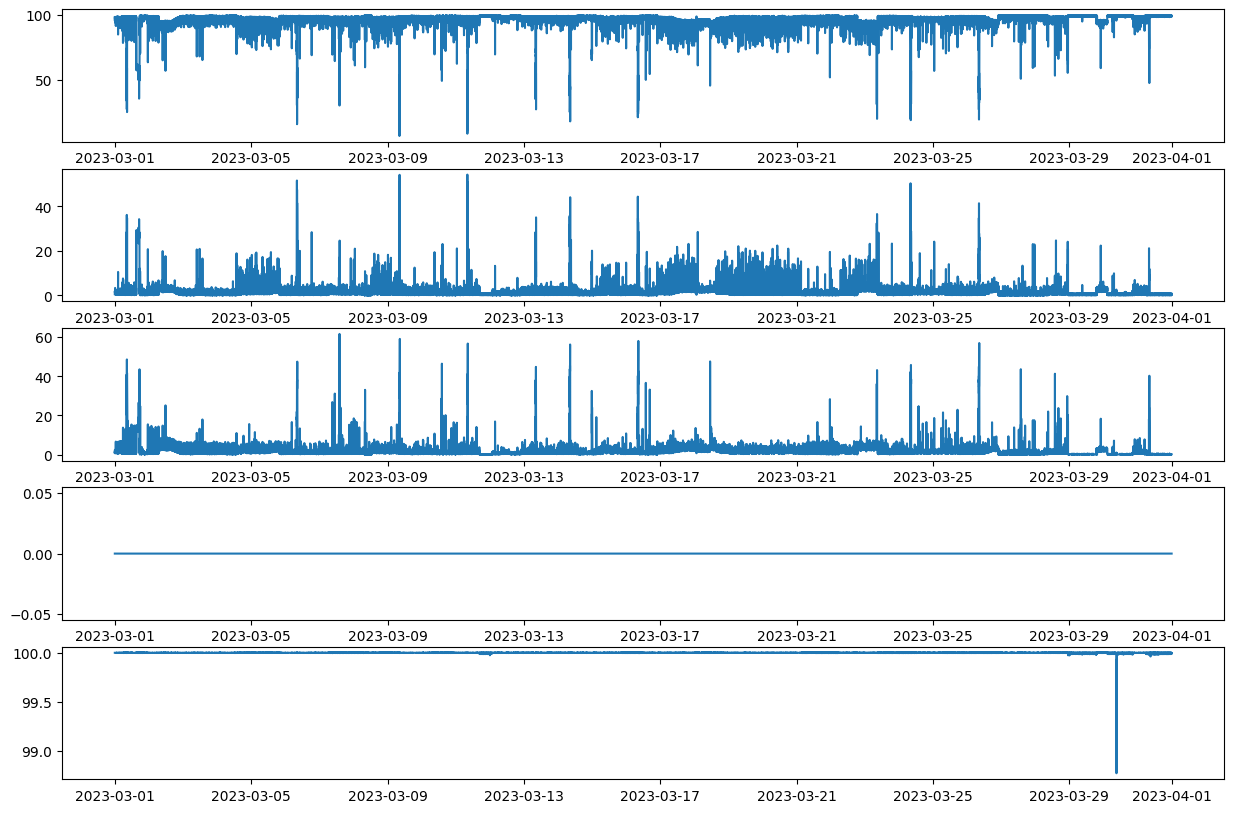

In [13]:
fig, ax = plt.subplots(5,1, figsize=(15, 10))

ax[0].plot(cpu["idle_st"])
ax[1].plot(cpu["user_st"])
ax[2].plot(cpu["system_st"])
ax[3].plot(cpu["steal_st"])
ax[4].plot(cpu["user_st"]+cpu["idle_st"]+cpu["system_st"]+cpu["steal_st"])

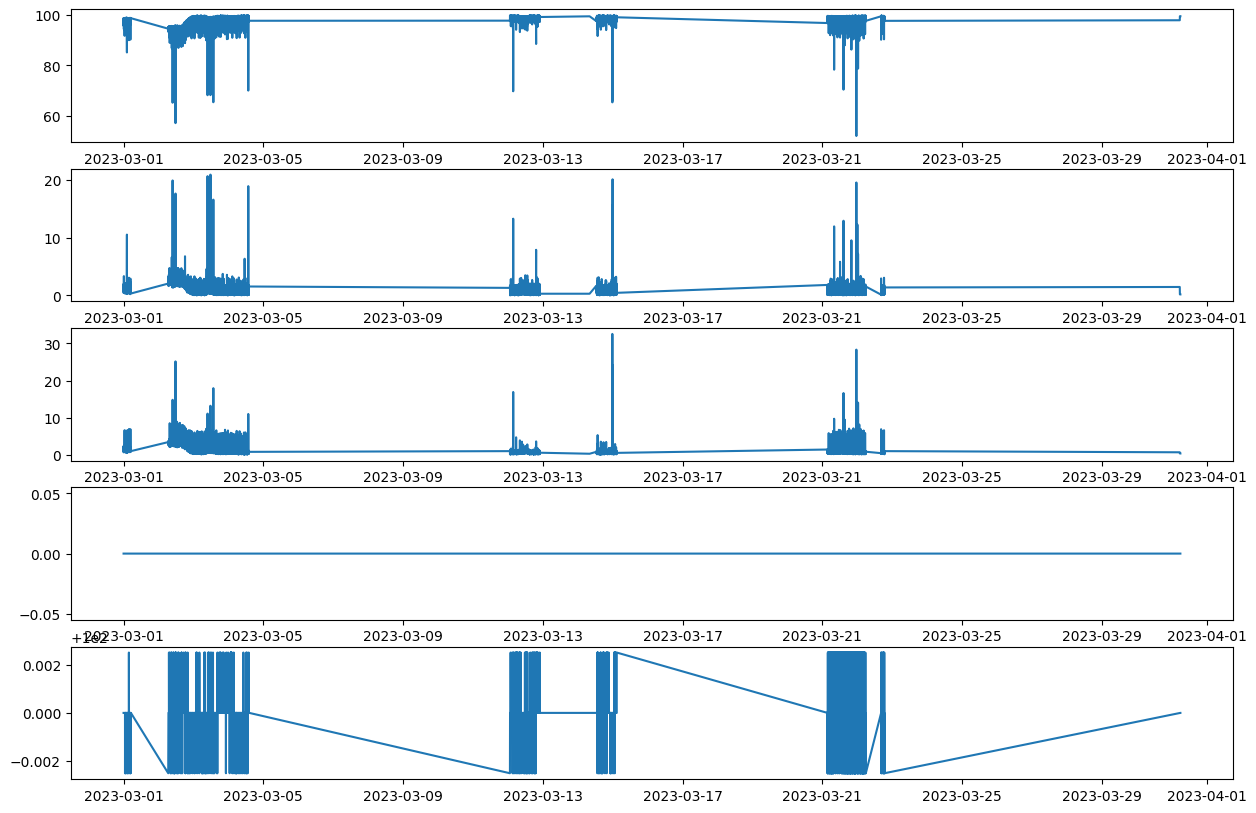

In [14]:
fig, ax = plt.subplots(5,1, figsize=(15, 10))

ax[0].plot(cpu[cpu["node"]=="QASERVER"]["idle_st"])
ax[1].plot(cpu[cpu["node"]=="QASERVER"]["user_st"])
ax[2].plot(cpu[cpu["node"]=="QASERVER"]["system_st"])
ax[3].plot(cpu[cpu["node"]=="QASERVER"]["steal_st"])
ax[4].plot(cpu[cpu["node"]=="QASERVER"]["user_st"]+cpu[cpu["node"]=="QASERVER"]["idle_st"]+cpu[cpu["node"]=="QASERVER"]["system_st"]+cpu[cpu["node"]=="QASERVER"]["steal_st"])

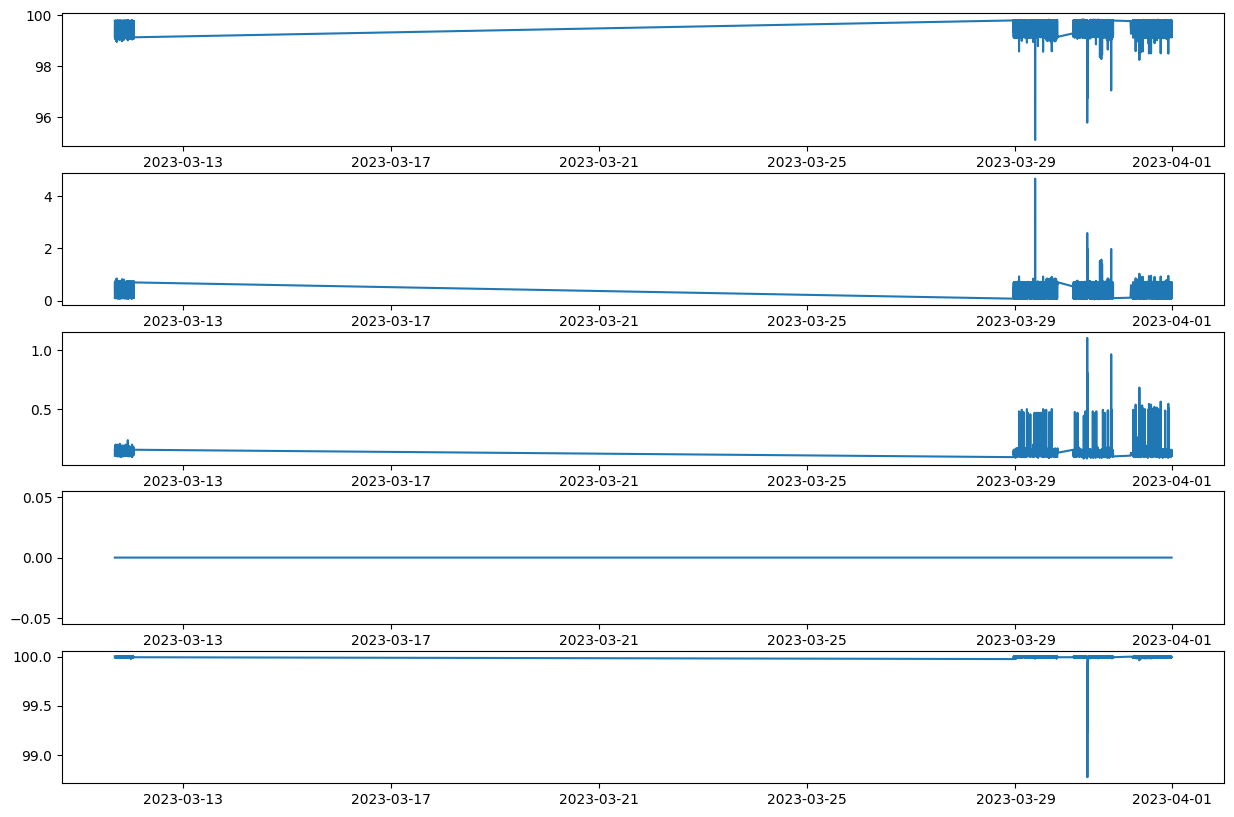

In [15]:
fig, ax = plt.subplots(5,1, figsize=(15, 10))

ax[0].plot(cpu[cpu["node"]=="PRUEBAS"]["idle_st"])
ax[1].plot(cpu[cpu["node"]=="PRUEBAS"]["user_st"])
ax[2].plot(cpu[cpu["node"]=="PRUEBAS"]["system_st"])
ax[3].plot(cpu[cpu["node"]=="PRUEBAS"]["steal_st"])
ax[4].plot(cpu[cpu["node"]=="PRUEBAS"]["user_st"]+cpu[cpu["node"]=="PRUEBAS"]["idle_st"]+cpu[cpu["node"]=="PRUEBAS"]["system_st"]+cpu[cpu["node"]=="PRUEBAS"]["steal_st"])

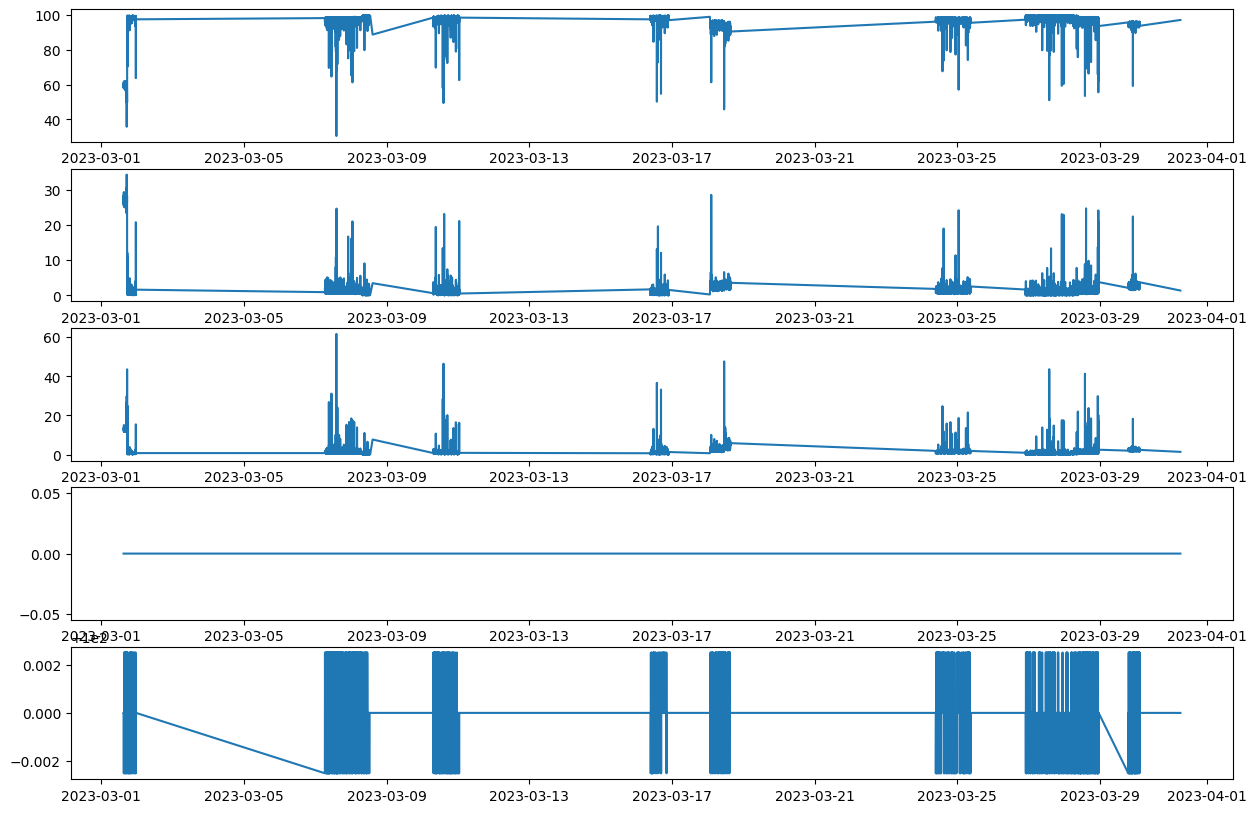

In [16]:
fig, ax = plt.subplots(5,1, figsize=(15, 10))

ax[0].plot(cpu[cpu["node"]=="PREPRODUCCION"]["idle_st"])
ax[1].plot(cpu[cpu["node"]=="PREPRODUCCION"]["user_st"])
ax[2].plot(cpu[cpu["node"]=="PREPRODUCCION"]["system_st"])
ax[3].plot(cpu[cpu["node"]=="PREPRODUCCION"]["steal_st"])
ax[4].plot(cpu[cpu["node"]=="PREPRODUCCION"]["user_st"]+cpu[cpu["node"]=="PREPRODUCCION"]["idle_st"]+cpu[cpu["node"]=="PREPRODUCCION"]["system_st"]+cpu[cpu["node"]=="PREPRODUCCION"]["steal_st"])

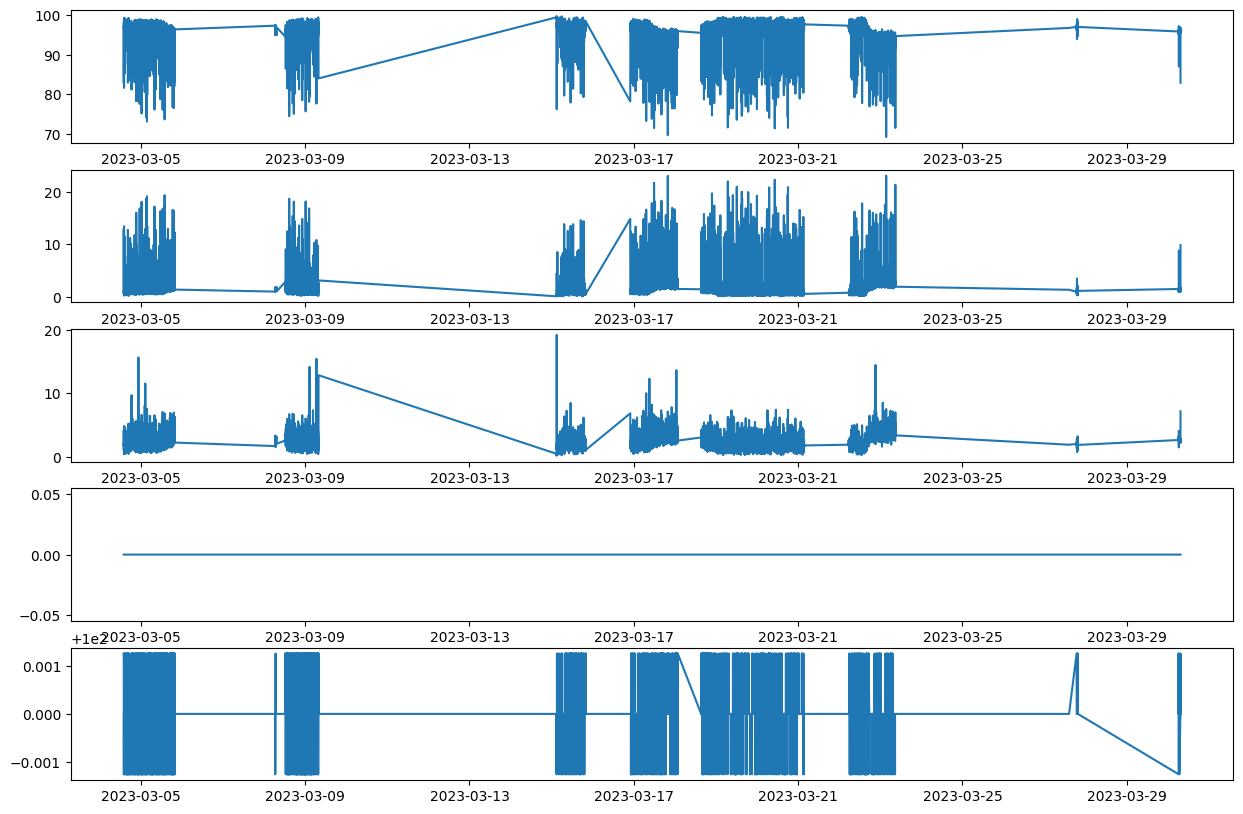

In [17]:
fig, ax = plt.subplots(5,1, figsize=(15, 10))

ax[0].plot(cpu[cpu["node"]=="PRODUCCION"]["idle_st"])
ax[1].plot(cpu[cpu["node"]=="PRODUCCION"]["user_st"])
ax[2].plot(cpu[cpu["node"]=="PRODUCCION"]["system_st"])
ax[3].plot(cpu[cpu["node"]=="PRODUCCION"]["steal_st"])
ax[4].plot(cpu[cpu["node"]=="PRODUCCION"]["user_st"]+cpu[cpu["node"]=="PRODUCCION"]["idle_st"]+cpu[cpu["node"]=="PRODUCCION"]["system_st"]+cpu[cpu["node"]=="PRODUCCION"]["steal_st"])

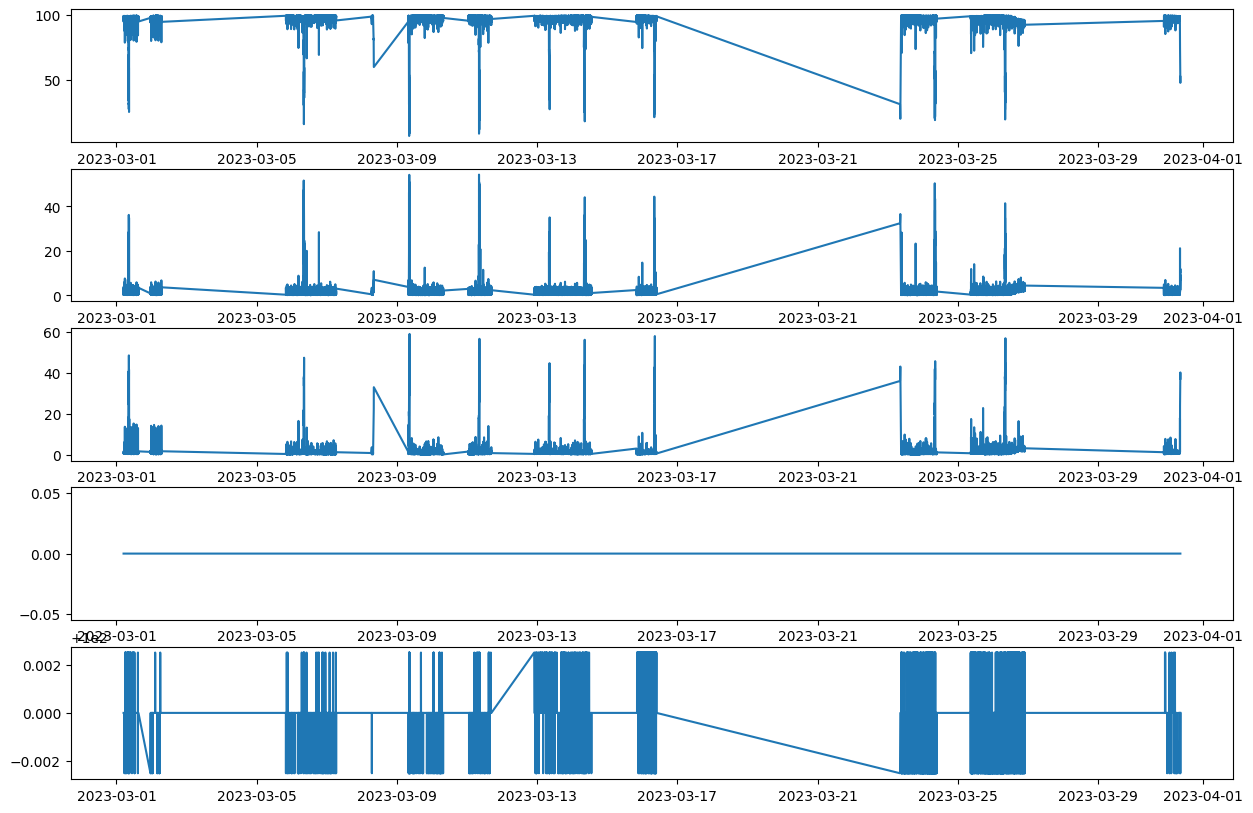

In [18]:
fig, ax = plt.subplots(5,1, figsize=(15, 10))

ax[0].plot(cpu[cpu["node"]=="DEVELOP"]["idle_st"])
ax[1].plot(cpu[cpu["node"]=="DEVELOP"]["user_st"])
ax[2].plot(cpu[cpu["node"]=="DEVELOP"]["system_st"])
ax[3].plot(cpu[cpu["node"]=="DEVELOP"]["steal_st"])
ax[4].plot(cpu[cpu["node"]=="DEVELOP"]["user_st"]+cpu[cpu["node"]=="DEVELOP"]["idle_st"]+cpu[cpu["node"]=="DEVELOP"]["system_st"]+cpu[cpu["node"]=="DEVELOP"]["steal_st"])

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

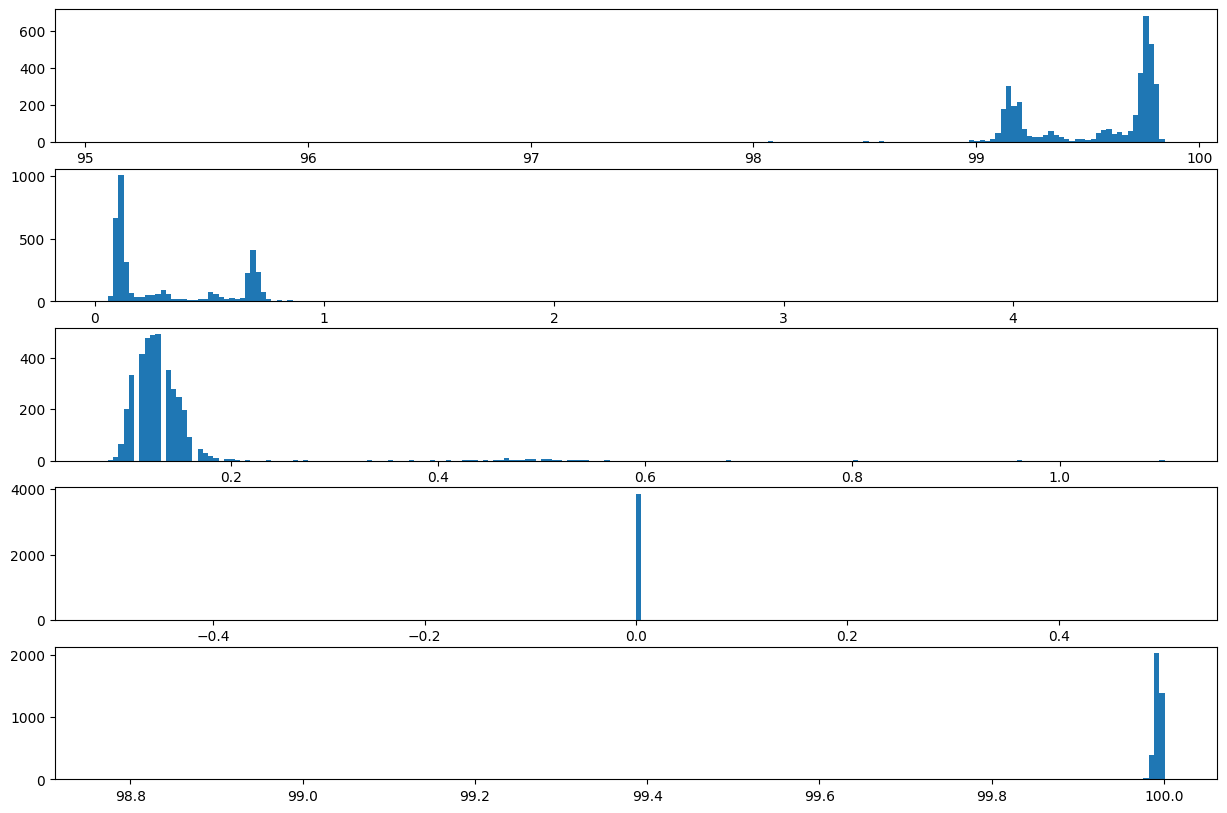

In [21]:
fig, ax = plt.subplots(5,1, figsize=(15, 10))

ax[0].hist(cpu[cpu["node"]=="PRUEBAS"]["idle_st"], bins=200)
ax[1].hist(cpu[cpu["node"]=="PRUEBAS"]["user_st"], bins=200)
ax[2].hist(cpu[cpu["node"]=="PRUEBAS"]["system_st"], bins=200)
ax[3].hist(cpu[cpu["node"]=="PRUEBAS"]["steal_st"], bins=200)
ax[4].hist(cpu[cpu["node"]=="PRUEBAS"]["user_st"]+cpu[cpu["node"]=="PRUEBAS"]["idle_st"]+cpu[cpu["node"]=="PRUEBAS"]["system_st"]+cpu[cpu["node"]=="PRUEBAS"]["steal_st"], bins=200)

(array([ 608.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1138., 8596.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
      

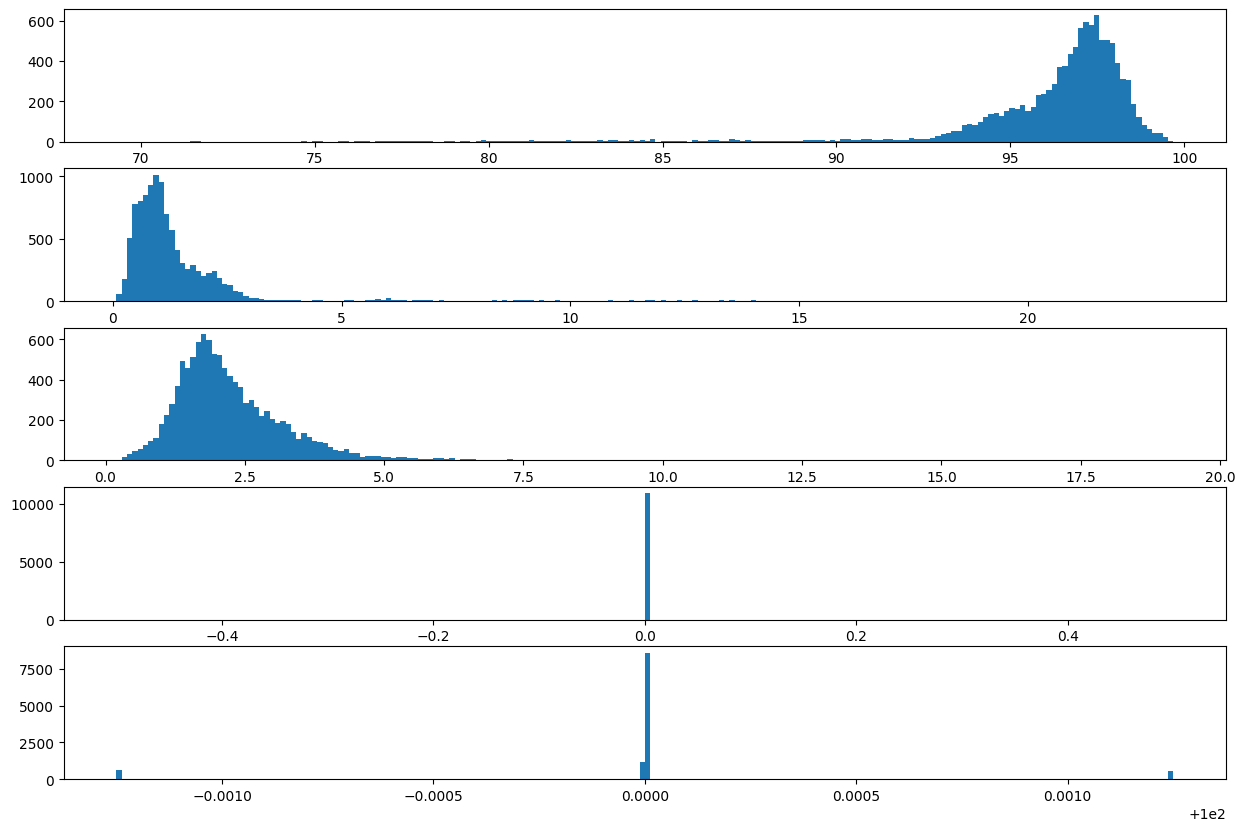

In [22]:
fig, ax = plt.subplots(5,1, figsize=(15, 10))

ax[0].hist(cpu[cpu["node"]=="PRODUCCION"]["idle_st"], bins=200)
ax[1].hist(cpu[cpu["node"]=="PRODUCCION"]["user_st"], bins=200)
ax[2].hist(cpu[cpu["node"]=="PRODUCCION"]["system_st"], bins=200)
ax[3].hist(cpu[cpu["node"]=="PRODUCCION"]["steal_st"], bins=200)
ax[4].hist(cpu[cpu["node"]=="PRODUCCION"]["user_st"]+cpu[cpu["node"]=="PRODUCCION"]["idle_st"]+cpu[cpu["node"]=="PRODUCCION"]["system_st"]+cpu[cpu["node"]=="PRODUCCION"]["steal_st"], bins=200)

(array([ 553.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1172., 7348.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
      

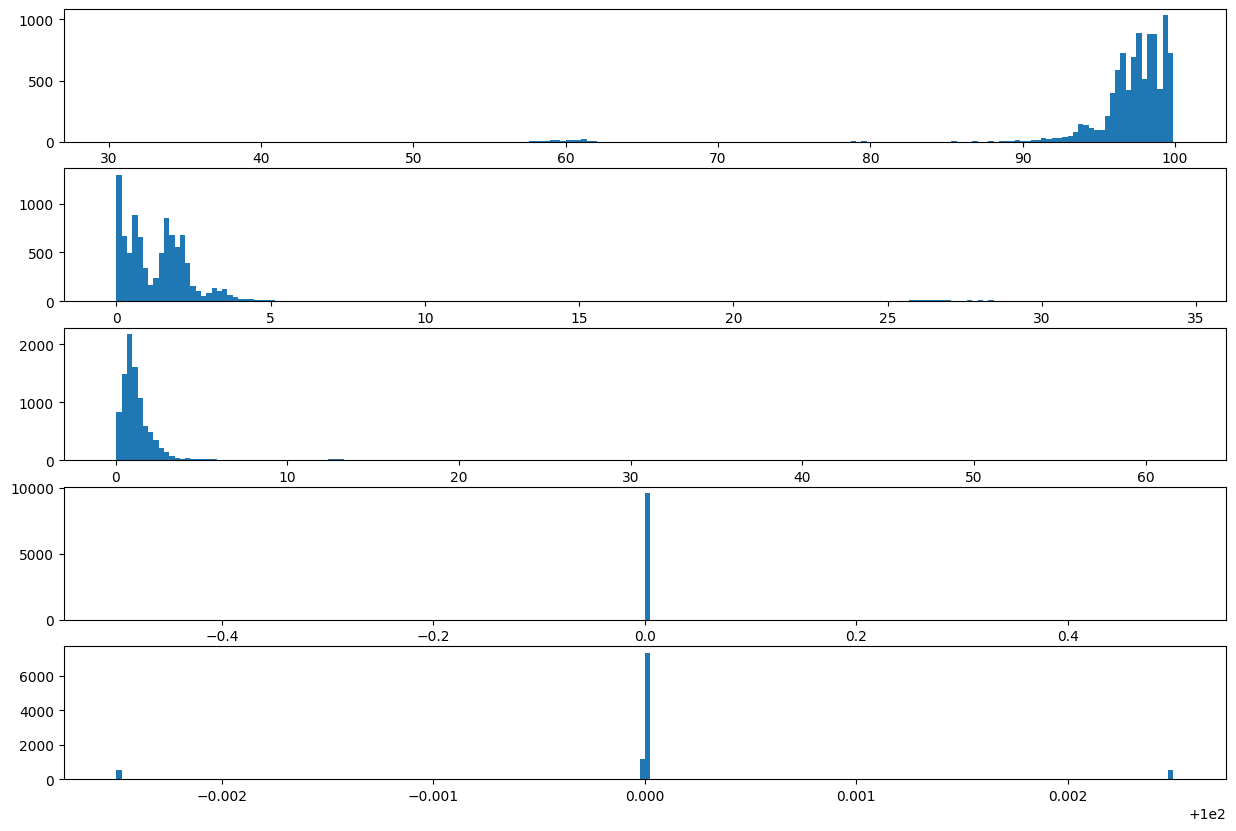

In [23]:
fig, ax = plt.subplots(5,1, figsize=(15, 10))

ax[0].hist(cpu[cpu["node"]=="PREPRODUCCION"]["idle_st"], bins=200)
ax[1].hist(cpu[cpu["node"]=="PREPRODUCCION"]["user_st"], bins=200)
ax[2].hist(cpu[cpu["node"]=="PREPRODUCCION"]["system_st"], bins=200)
ax[3].hist(cpu[cpu["node"]=="PREPRODUCCION"]["steal_st"], bins=200)
ax[4].hist(cpu[cpu["node"]=="PREPRODUCCION"]["user_st"]+cpu[cpu["node"]=="PREPRODUCCION"]["idle_st"]+cpu[cpu["node"]=="PREPRODUCCION"]["system_st"]+cpu[cpu["node"]=="PREPRODUCCION"]["steal_st"], bins=200)

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

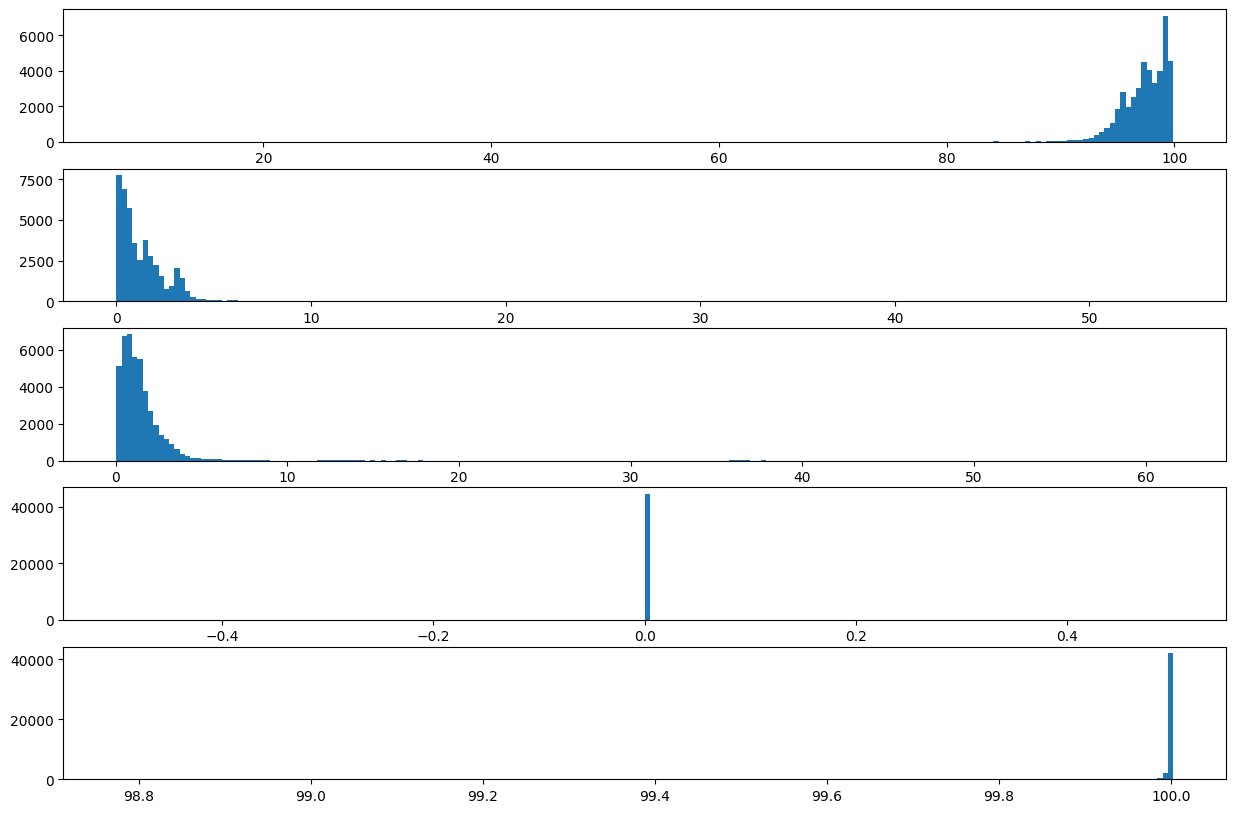

In [27]:
fig, ax = plt.subplots(5,1, figsize=(15, 10))

ax[0].hist(cpu["idle_st"], bins=200)
ax[1].hist(cpu["user_st"], bins=200)
ax[2].hist(cpu["system_st"], bins=200)
ax[3].hist(cpu["steal_st"], bins=200)
ax[4].hist(cpu["user_st"]+cpu["idle_st"]+cpu["system_st"]+cpu["steal_st"], bins=200)

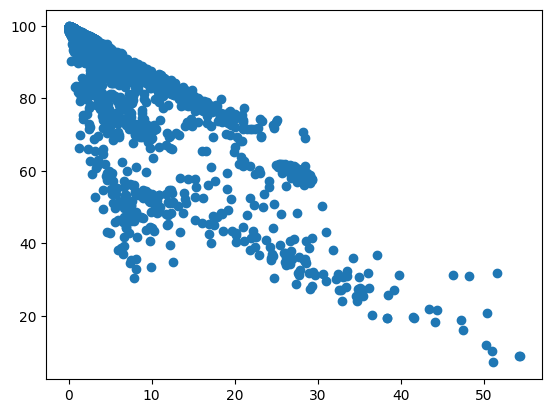

In [24]:
plt.scatter(cpu["user_st"], cpu["idle_st"])


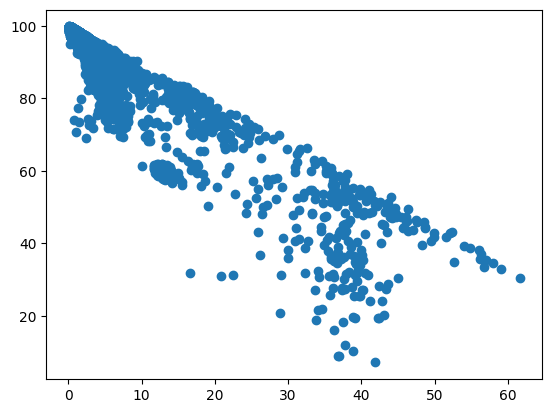

In [25]:
plt.scatter(cpu["system_st"], cpu["idle_st"])


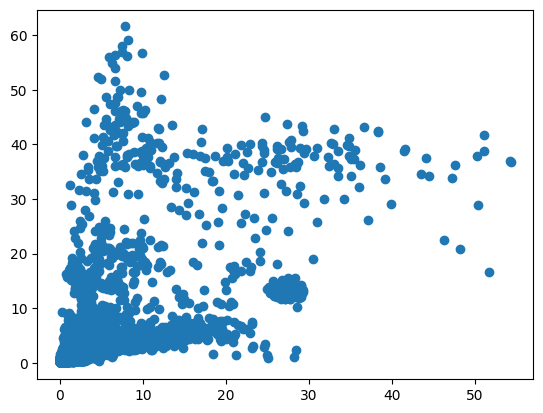

In [26]:
plt.scatter(cpu["user_st"], cpu["system_st"])


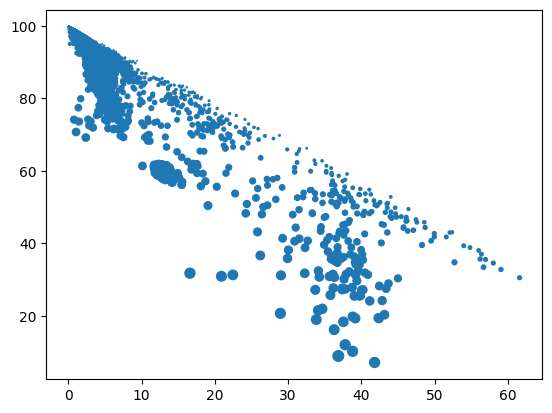

In [28]:
plt.scatter(cpu["system_st"], cpu["idle_st"], cpu["user_st"])

In [31]:
import plotly.express as px

fig = px.scatter_3d(cpu, x="system_st", y="idle_st", z="user_st")
fig.show()

In [32]:
cpu["user_delta"] = cpu["user_st"] - cpu["user_st"].shift()
cpu["idle_delta"] = cpu["idle_st"] - cpu["idle_st"].shift()
cpu["system_delta"] = cpu["system_st"] - cpu["system_st"].shift()

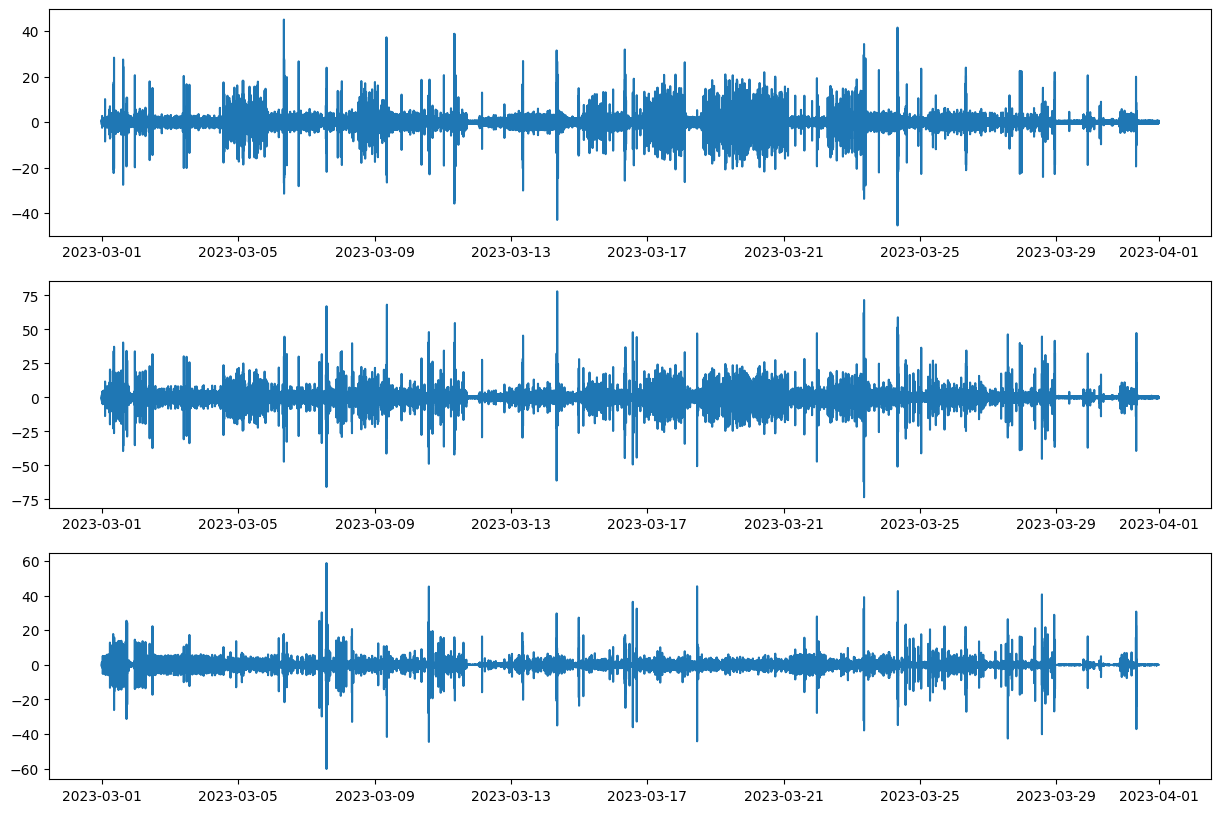

In [33]:
fig, ax = plt.subplots(3,1, figsize=(15, 10))

ax[0].plot(cpu["user_delta"])
ax[1].plot(cpu["idle_delta"])
ax[2].plot(cpu["system_delta"])


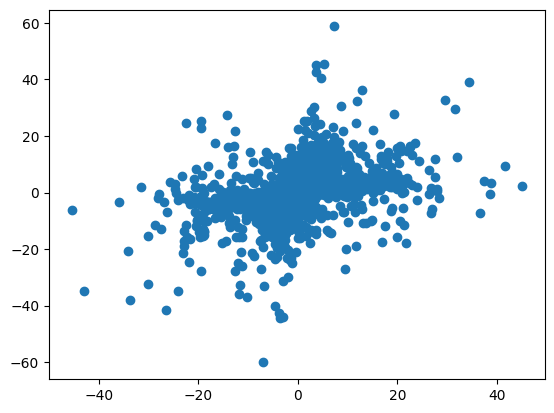

In [34]:
plt.scatter(cpu["user_delta"], cpu["system_delta"])

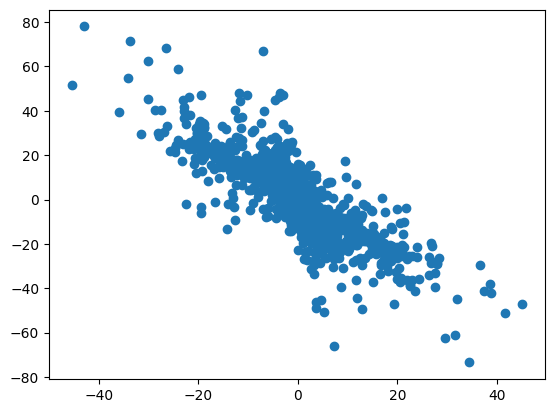

In [35]:
plt.scatter(cpu["user_delta"], cpu["idle_delta"])

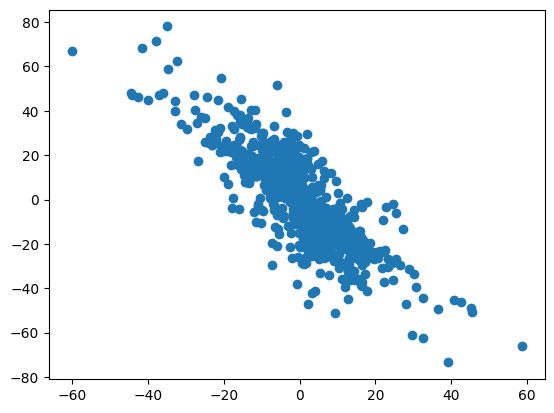

In [36]:
plt.scatter(cpu["system_delta"], cpu["idle_delta"])

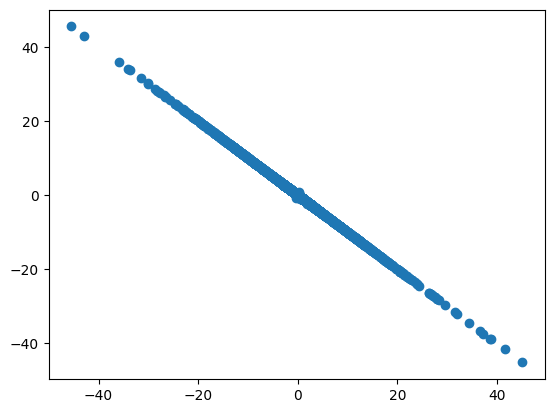

In [37]:
plt.scatter(cpu["user_delta"], cpu["idle_delta"]+cpu["system_delta"])

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 5.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 3.000e+00, 3.000e+00, 5.000e+00, 5.000e+00,
        4.000e+00, 5.000e+00, 8.000e+00, 4.000e+00, 8.000e+00, 1.000e+01,
        6.000e+00, 1.400e+01, 1.400e+01, 1.500e+01, 1.300e+01, 2.000e+01,
        2.100e+01, 2.500e+01, 1.800e+01, 1.900e+01, 2.900e+01, 3.900e+01,
        3.000e+01, 5.600e+01, 3.600e+0

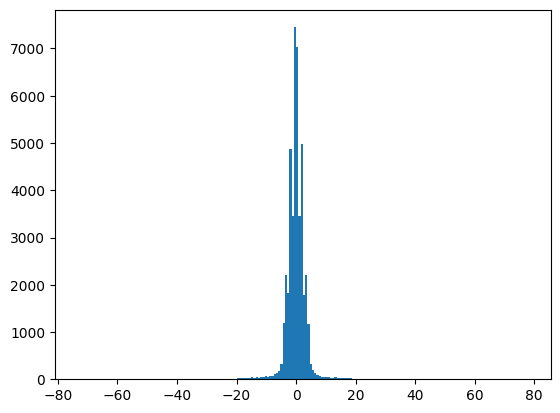

In [46]:
plt.hist(cpu["idle_delta"], bins=200)

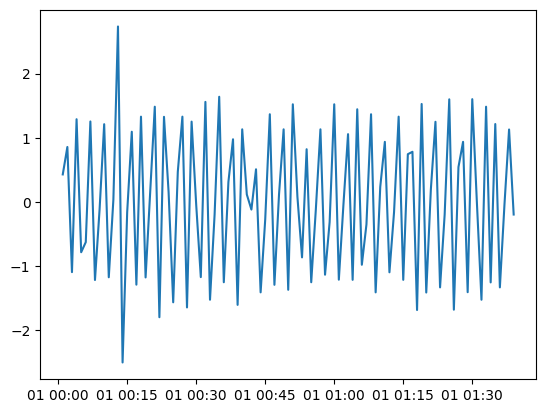

In [74]:
plt.plot(cpu["user_delta"][0:100])
plt.plot(cpu["user_delta"].rolling(100).mean()[0:100])

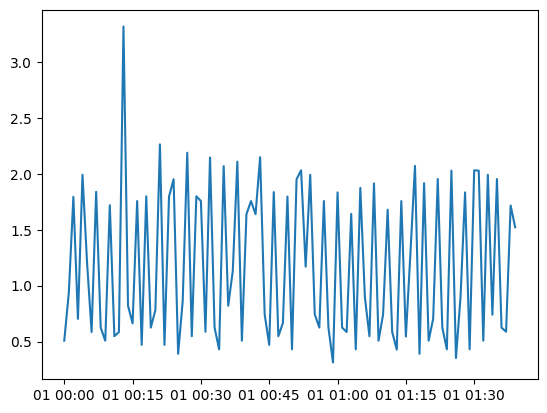

In [72]:
plt.plot(cpu["user_st"][0:100])

/tmp/ipykernel_27892/1554719527.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_27892/1554719527.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



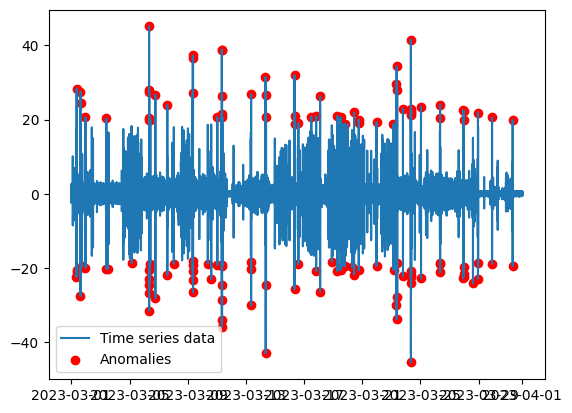

In [87]:
from sklearn.ensemble import IsolationForest

cpu2 = cpu[cpu["user_delta"].notna()]

# create a feature matrix from the time series data
X = cpu2[['user_delta']].values

# train the isolation forest model on the feature matrix
model = IsolationForest(n_estimators=1000, contamination=0.003)
model.fit(X)

# predict the anomalies using the trained model
anomaly_scores = model.decision_function(X)
anomalies = model.predict(X)

# add the anomaly scores and predictions to the original data frame
cpu2['anomaly_score'] = anomaly_scores
cpu2['is_anomaly'] = anomalies

# plot the time series data and the detected anomalies
plt.plot(cpu2.index, cpu2['user_delta'], label='Time series data')
plt.scatter(cpu2[cpu2['is_anomaly'] == -1].index, cpu2[cpu2['is_anomaly'] == -1]['user_delta'], color='red', label='Anomalies')
plt.legend()
plt.show()